In [140]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [141]:
FOLDER = 'Logs'
files = os.listdir(FOLDER)

#headings = list(filter(lambda x: 'headings' in x and not 'old' in x, files))
headings = list(filter(lambda x: 'headings' in x, files))
headings_csv = [pd.read_csv(os.path.join(FOLDER, x)) for x in headings]

#positions = list(filter(lambda x: 'position' in x and not 'old' in x, files))
positions = list(filter(lambda x: 'position' in x, files))
positions_csv = [pd.read_csv(os.path.join(FOLDER, x)) for x in positions]

In [142]:
headings

['RTI_Class_headings_JorgeP_26_M_2.csv',
 'RTI_Class_headings_Lena_33_F_0.csv',
 'RTI_Class_headings_Gina_36_F_0.csv',
 'RTI_Class_headings_Javier_24_M_old_2.csv',
 'RTI_Class_headings_DavidF_25_M_0.csv',
 'RTI_Class_headings_Sara_23_F_old_0.csv',
 'RTI_Class_headings_Alex_26_M_0.csv',
 'RTI_Class_headings_SmrtSapiens_23_M_0.csv',
 'RTI_Class_headings_Juana_33_F_1.csv',
 'RTI_Class_headings_Aldo_35_M_1.csv',
 'RTI_Class_headings_Joe_36_M_2.csv',
 'RTI_Class_headings_Aarushi_26_F_1.csv',
 'RTI_Class_headings_Jonas_30_M_0.csv',
 'RTI_Class_headings_Monica_27_F_1.csv',
 'RTI_Class_headings_Carlos_32_M_1.csv',
 'RTI_Class_headings_Carolina_28_F_old_2.csv',
 'RTI_Class_headings_Neil_22_M_1.csv',
 'RTI_Class_headings_NataliaM_25_F_old_0.csv',
 'RTI_Class_headings_JuanT_18_M_1.csv',
 'RTI_Class_headings_Cesc_25_M_old_0.csv',
 'RTI_Class_headings_Maja_26_F_old_2.csv',
 'RTI_Class_headings_Maud_31_F_1.csv',
 'RTI_Class_headings_SergioR_26_M_2.csv',
 'RTI_Class_headings_Alejandre_27_M_1.csv',
 '

In [143]:
positions

['RTI_Class_positions_JuanT_18_M_1.csv',
 'RTI_Class_positions_NataliaM_25_F_old_0.csv',
 'RTI_Class_positions_Carolina_28_F_old_2.csv',
 'RTI_Class_positions_Javier_24_M_old_2.csv',
 'RTI_Class_positions_Lena_33_F_0.csv',
 'RTI_Class_positions_Gina_36_F_0.csv',
 'RTI_Class_positions_Sara_23_F_old_0.csv',
 'RTI_Class_positions_Alex_26_M_0.csv',
 'RTI_Class_positions_SergioR_26_M_2.csv',
 'RTI_Class_positions_Aldo_35_M_1.csv',
 'RTI_Class_positions_DavidL_23_M_2.csv',
 'RTI_Class_positions_Juana_33_F_1.csv',
 'RTI_Class_positions_DavidF_25_M_0.csv',
 'RTI_Class_positions_Neil_22_M_1.csv',
 'RTI_Class_positions_Joe_36_M_2.csv',
 'RTI_Class_positions_Jonas_30_M_0.csv',
 'RTI_Class_positions_JorgeP_26_M_2.csv',
 'RTI_Class_positions_Maja_26_F_old_2.csv',
 'RTI_Class_positions_Cesc_25_M_old_0.csv',
 'RTI_Class_positions_Monica_27_F_1.csv',
 'RTI_Class_positions_Carlos_32_M_1.csv',
 'RTI_Class_positions_Maud_31_F_1.csv',
 'RTI_Class_positions_SmrtSapiens_23_M_0.csv',
 'RTI_Class_positions_Aa

1 --> 53.817543446215566
0 --> 147.94648624624378
2 --> 9.089353351335738
2 --> 21.611198077291412
0 --> 7.135922343215977
0 --> 45.03825929855332
0 --> 8.647260890207084
0 --> 214.4282264751542
2 --> 8.576839329172547
1 --> 14.630140384330424
2 --> 30.356682774231114
1 --> 5.525800845909845
0 --> 135.51806356000517
1 --> 39.930578385138624
2 --> 8.370059930380489
0 --> 11.737762586335824
2 --> 9.743194955678348
2 --> 21.134936857227387
0 --> 43.60917207687507
1 --> 31.67527672983142
1 --> 23.46074872156873
1 --> 37.8430996501672
0 --> 42.71427780651921
1 --> 57.331455917267235
1 --> 50.4615072543077
0 --> 24.456273631792392
2 --> 36.64804988779894
2 --> 21.265124123935887


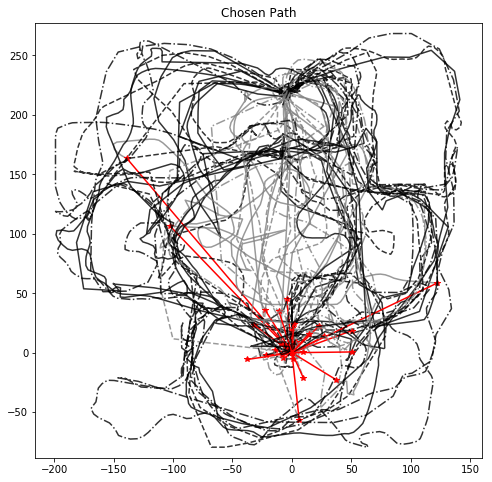

In [144]:
types = []
errs = []
times = []
times_return = []

ls_dict = {'0': 'solid',
           '1': '--',
           '2': '-.'}

color_dict = {'0': 'red',
              '1': 'red',
              '2': 'red'}

plt.figure(figsize=(8, 8))
plt.axis('equal')
for h, name in zip(positions_csv[:], positions[:]):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1] +3

    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    time = h['time'].iloc[-1]
    return_time = h.time.iloc[-1] - h.loc[split_idx].time
    
    
    plt.plot(h.iloc[:split_idx].x,
             h.iloc[:split_idx].z,
             c='k', ls=ls_dict[exp_type], alpha=0.8, label='Finding')
    plt.plot(h.iloc[split_idx:].x,
             h.iloc[split_idx:].z,
             c='grey', ls=ls_dict[exp_type], alpha=0.8, label='Homing')
    
    x0 = h.x.iloc[0]
    x1 = h.x.iloc[-1]
    
    z0 = h.z.iloc[0]
    z1 = h.z.iloc[-1]
    
    error = np.sqrt(np.power(x1 - x0, 2) + \
                np.power(z1- z0, 2))
    
    plt.plot([x0, x1], [z0, z1], c=color_dict[exp_type], marker='*')
    
    print(exp_type, '-->', error)
    
    types.append(exp_type)
    errs.append(error)
    times.append(time)
    times_return.append(return_time)
plt.title('Chosen Path')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys())
#plt.legend()

1 --> 53.817543446215566
0 --> 147.94648624624378
2 --> 9.089353351335738
2 --> 21.611198077291412
0 --> 7.135922343215977
0 --> 45.03825929855332
0 --> 8.647260890207084
0 --> 214.4282264751542
2 --> 8.576839329172547
1 --> 14.630140384330424
2 --> 30.356682774231114
1 --> 5.525800845909845
0 --> 135.51806356000517
1 --> 39.930578385138624
2 --> 8.370059930380489
0 --> 11.737762586335824
2 --> 9.743194955678348
2 --> 21.134936857227387
0 --> 43.60917207687507
1 --> 31.67527672983142
1 --> 23.46074872156873
1 --> 37.8430996501672
0 --> 42.71427780651921
1 --> 57.331455917267235
1 --> 50.4615072543077
0 --> 24.456273631792392
2 --> 36.64804988779894
2 --> 21.265124123935887


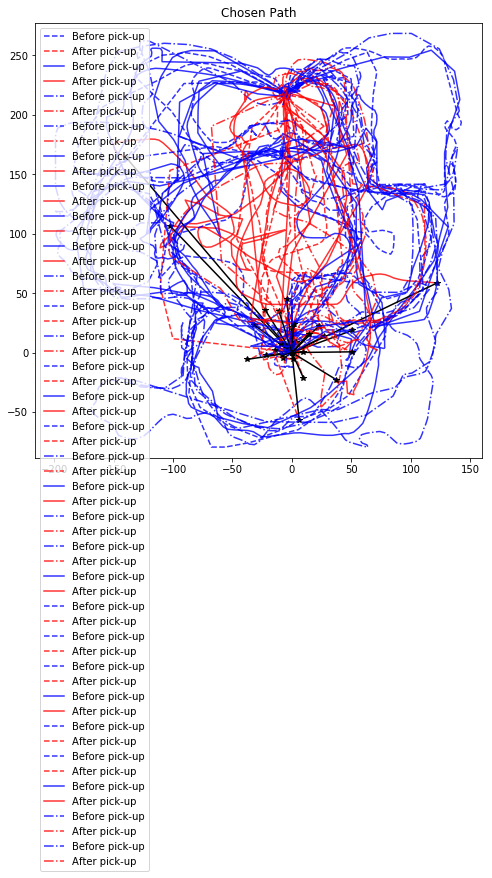

In [145]:
types = []
errs = []
times = []
times_return = []

ls_dict = {'0': 'solid',
           '1': '--',
           '2': '-.'}

color_dict = {'0': 'k',
              '1': 'k',
              '2': 'k'}

plt.figure(figsize=(8, 8))
plt.axis('equal')
for h, name in zip(positions_csv[:], positions[:]):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1] +3

    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    time = h['time'].iloc[-1]
    return_time = h.time.iloc[-1] - h.loc[split_idx].time
    
    
    plt.plot(h.iloc[:split_idx].x,
             h.iloc[:split_idx].z,
             c='blue', ls=ls_dict[exp_type], alpha=0.8, label='Before pick-up')
    plt.plot(h.iloc[split_idx:].x,
             h.iloc[split_idx:].z,
             c='red', ls=ls_dict[exp_type], alpha=0.8, label='After pick-up')
    
    x0 = h.x.iloc[0]
    x1 = h.x.iloc[-1]
    
    z0 = h.z.iloc[0]
    z1 = h.z.iloc[-1]
    
    error = np.sqrt(np.power(x1 - x0, 2) + \
                np.power(z1- z0, 2))
    
    plt.plot([x0, x1], [z0, z1], c=color_dict[exp_type], marker='*')
    
    print(exp_type, '-->', error)
plt.title('Chosen Path')
plt.legend()

1 --> 53.817543446215566
0 --> 147.94648624624378
2 --> 9.089353351335738
2 --> 21.611198077291412
0 --> 7.135922343215977
0 --> 45.03825929855332
0 --> 8.647260890207084
0 --> 214.4282264751542
2 --> 8.576839329172547
1 --> 14.630140384330424
2 --> 30.356682774231114
1 --> 5.525800845909845
0 --> 135.51806356000517
1 --> 39.930578385138624
2 --> 8.370059930380489


/Users/pablot/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/pablot/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/pablot/anaconda3/lib/python3.7/site-packages/matplotl

0 --> 11.737762586335824
2 --> 9.743194955678348
2 --> 21.134936857227387
0 --> 43.60917207687507
1 --> 31.67527672983142
1 --> 23.46074872156873
1 --> 37.8430996501672
0 --> 42.71427780651921
1 --> 57.331455917267235
1 --> 50.4615072543077
0 --> 24.456273631792392
2 --> 36.64804988779894
2 --> 21.265124123935887


/Users/pablot/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/pablot/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/pablot/anaconda3/lib/python3.7/site-packages/matplotl

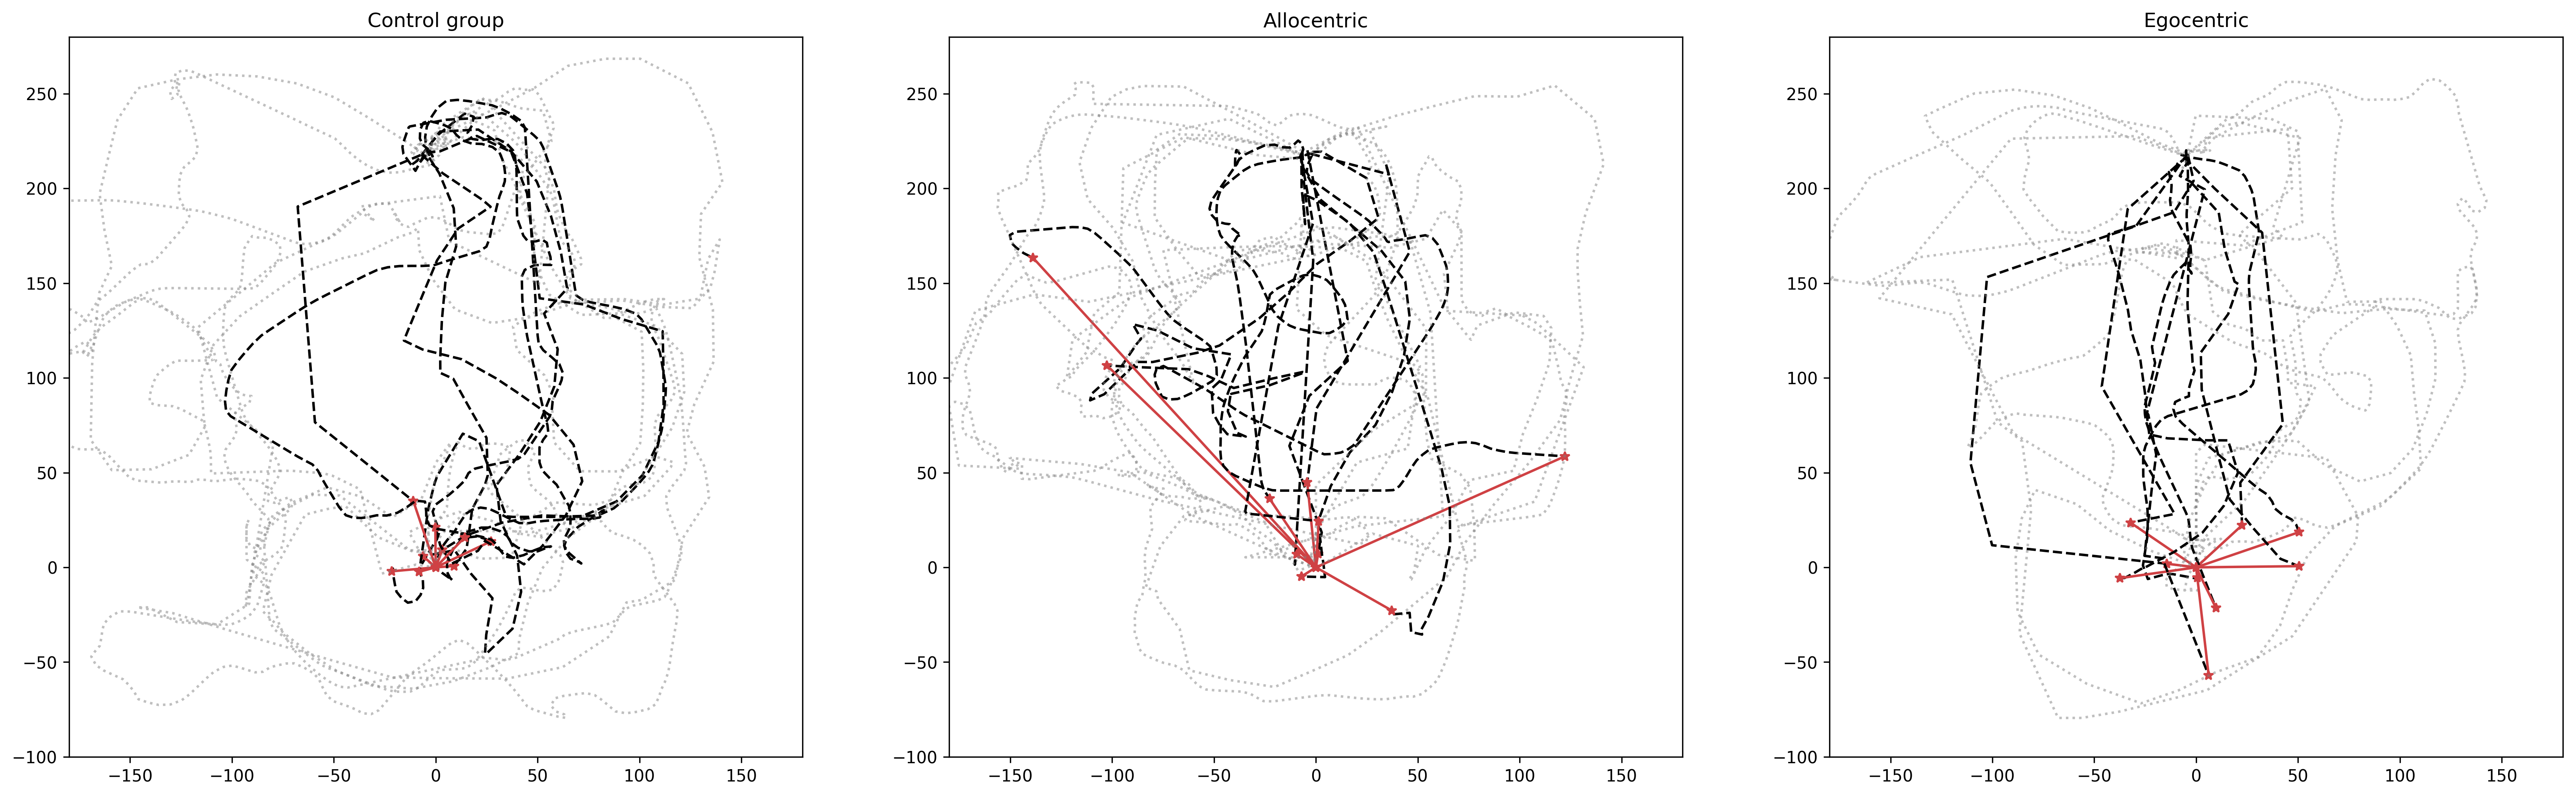

In [215]:
plt.figure(figsize=(27, 8), dpi=300)
plt.axis('equal')

color_dict = {'0': '#cf4144',
              '1': '#cf4144',
              '2': '#cf4144'}

for h, name in zip(positions_csv[:], positions[:]):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1] +3

    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    time = h['time'].iloc[-1]
    return_time = h.time.iloc[-1] - h.loc[split_idx].time

    if exp_type == '2':
        plt.subplot(131)
        plt.title('Control group')
    if exp_type == '0':
        plt.subplot(132)
        plt.title('Allocentric')
    if exp_type == '1':
        plt.subplot(133)
        plt.title('Egocentric')
    
    plt.xlim(-180, 180)
    plt.ylim(-100, 280)
    
    plt.plot(h.iloc[:split_idx].x,
             h.iloc[:split_idx].z,
             c='grey', ls=':', alpha=0.5)
    plt.plot(h.iloc[split_idx:].x,
             h.iloc[split_idx:].z,
             c='k', ls='--', alpha=1)
    
    x0 = h.x.iloc[0]
    x1 = h.x.iloc[-1]
    
    z0 = h.z.iloc[0]
    z1 = h.z.iloc[-1]
    
    error = np.sqrt(np.power(x1 - x0, 2) + \
                np.power(z1- z0, 2))
    
    plt.plot([x0, x1], [z0, z1], c=color_dict[exp_type], marker='*')
    
    print(exp_type, '-->', error)
    
    types.append(exp_type)
    errs.append(error)
    times.append(time)
    times_return.append(return_time)
#plt.title('Chosen Path')
#plt.legend()

1 --> 53.817543446215566
0 --> 147.94648624624378
2 --> 9.089353351335738
2 --> 21.611198077291412
0 --> 7.135922343215977
0 --> 45.03825929855332
0 --> 8.647260890207084
0 --> 214.4282264751542
2 --> 8.576839329172547
1 --> 14.630140384330424
2 --> 30.356682774231114
1 --> 5.525800845909845
0 --> 135.51806356000517
1 --> 39.930578385138624
2 --> 8.370059930380489
0 --> 11.737762586335824
2 --> 9.743194955678348
2 --> 21.134936857227387
0 --> 43.60917207687507
1 --> 31.67527672983142
1 --> 23.46074872156873
1 --> 37.8430996501672
0 --> 42.71427780651921
1 --> 57.331455917267235
1 --> 50.4615072543077
0 --> 24.456273631792392
2 --> 36.64804988779894
2 --> 21.265124123935887
135.1483840586339
660.9053654474716
270.678099999486


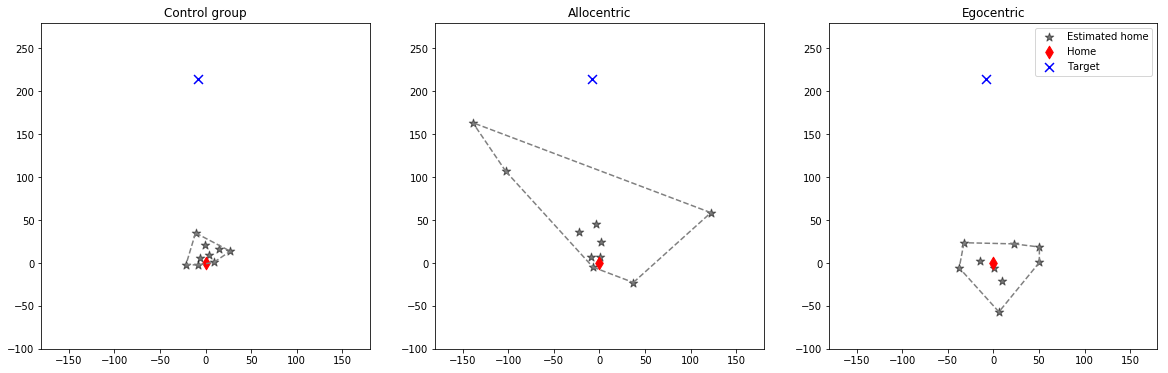

In [240]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from matplotlib.patches import Ellipse, Polygon

plt.figure(figsize=(20, 6))
plt.axis('equal')

d_points = {'0': [],
            '1': [],
            '2': []}

for h, name in zip(positions_csv[:], positions[:]):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1] +3

    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    time = h['time'].iloc[-1]
    return_time = h.time.iloc[-1] - h.loc[split_idx].time

    if exp_type == '2':
        plt.subplot(131)
        plt.title('Control group')
    if exp_type == '0':
        plt.subplot(132)
        plt.title('Allocentric')
    if exp_type == '1':
        plt.subplot(133)
        plt.title('Egocentric')
    
    plt.xlim(-180, 180)
    plt.ylim(-100, 280)
    
    x0 = h.x.iloc[0]
    x1 = h.x.iloc[-1]
    
    z0 = h.z.iloc[0]
    z1 = h.z.iloc[-1]
    
    error = np.sqrt(np.power(x1 - x0, 2) + \
                np.power(z1- z0, 2))
    plt.scatter([x1], [z1], s=80, c='#00000088', marker='*', label='Estimated home')
    
    d_points[exp_type].append((x1, z1))
    
    print(exp_type, '-->', error)    

plt.subplot(131)
plt.scatter(x0, z0, marker='d', s=80, c='red', label='Home')
plt.scatter(h.iloc[split_idx].x, h.iloc[split_idx].z, s=80, c='blue', marker='x', label='Target')
points = np.array(d_points['2'])
hull = ConvexHull(points)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], color='grey', ls='--')
print(hull.area)

plt.subplot(132)
plt.scatter(x0, z0, marker='d', s=80, c='red', label='Home')
plt.scatter(h.iloc[split_idx].x, h.iloc[split_idx].z, s=80, c='blue', marker='x', label='Target')
points = np.array(d_points['0'])
hull = ConvexHull(points)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], color='grey', ls='--')
print(hull.area)

ax3 = plt.subplot(133)
plt.scatter(x0, z0, marker='d', s=80, c='red', label='Home')
plt.scatter(h.iloc[split_idx].x, h.iloc[split_idx].z, s=80, c='blue', marker='x', label='Target')
points = np.array(d_points['1'])
hull = ConvexHull(points)
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], color='grey', ls='--')
print(hull.area)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
#plt.title('Chosen Path')
#plt.legend()

In [235]:
points[simplex, 0]

array([ 22.54135, -32.21766])

In [232]:
hull.simplices

array([[7, 6],
       [3, 6],
       [8, 0],
       [8, 7],
       [4, 0],
       [4, 3]], dtype=int32)

In [148]:
results = pd.DataFrame(np.array([types, errs, times, times_return]).astype(np.float32).T,
                       columns=['group', 'err', 'time', 'return_times'])

In [149]:
results.groupby('group').count()

err  time  return_times
group                         
0.0     10    10            10
1.0      9     9             9
2.0      9     9             9

In [150]:
results.groupby('group')['time'].mean()

group
0.0    100.097801
1.0     93.819046
2.0    107.910316
Name: time, dtype: float32

In [151]:
results.groupby('group')['return_times'].mean()

group
0.0    37.000549
1.0    37.202175
2.0    35.670021
Name: return_times, dtype: float32

In [152]:
results.groupby('group')['return_times'].std()

group
0.0    16.153477
1.0    14.228909
2.0     7.460892
Name: return_times, dtype: float32

In [153]:
results.groupby('group')['err'].mean()

group
0.0    68.123169
1.0    34.964016
2.0    18.532825
Name: err, dtype: float32

In [154]:
results.groupby('group')['err'].std()

group
0.0    71.834221
1.0    17.860928
2.0    10.371343
Name: err, dtype: float32

In [155]:
from scipy.stats import f_oneway, normaltest

In [156]:
type_ = 'return_times'

e0 = results[results['group']==0][type_]
e1 = results[results['group']==1][type_]
e2 = results[results['group']==2][type_]
#print(normaltest(e0))
#print(normaltest(e1))
#print(normaltest(e2))

print(f_oneway(e0, e1, e2))

F_onewayResult(statistic=0.03572020467779292, pvalue=0.9649593871544948)


In [157]:
e1 = results[results['group']==1]

In [158]:
from scipy.stats import pearsonr

In [159]:
pearsonr(e1['time'], e1['err'])

(-0.5305557989543263, 0.1416902995434301)

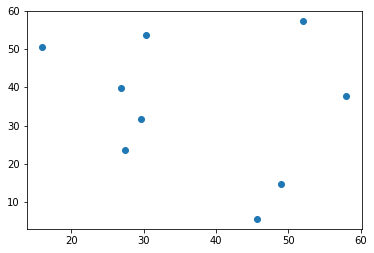

In [160]:
plt.scatter(e1['return_times'], e1['err'])

In [161]:
e1

group        err        time  return_times
0     1.0  53.817543   54.183830     30.381491
9     1.0  14.630140  167.984604     49.000599
11    1.0   5.525801  140.591904     45.604340
13    1.0  39.930580   69.006233     26.816750
19    1.0  31.675276   70.615433     29.616430
20    1.0  23.460749   55.996891     27.404421
21    1.0  37.843102  107.994698     58.003250
23    1.0  57.331455  119.998001     52.006351
24    1.0  50.461506   57.999802     15.985930

In [162]:
results

group         err        time  return_times
0     1.0   53.817543   54.183830     30.381491
1     0.0  147.946487  121.001900     80.013031
2     2.0    9.089354  150.983795     36.996300
3     2.0   21.611198   64.986214     32.787601
4     0.0    7.135922  140.793106     28.803200
5     0.0   45.038258   69.610878     34.005970
6     0.0    8.647261   78.993942     25.003611
7     0.0  214.428223   58.784901     39.188709
8     2.0    8.576839   55.000011     29.011570
9     1.0   14.630140  167.984604     49.000599
10    2.0   30.356682  108.600601     31.996189
11    1.0    5.525801  140.591904     45.604340
12    0.0  135.518066  130.205597     41.017521
13    1.0   39.930580   69.006233     26.816750
14    2.0    8.370060  131.603104     48.415749
15    0.0   11.737762   75.008247     29.596310
16    2.0    9.743195   96.008041     30.000120
17    2.0   21.134937  100.991898     48.003979
18    0.0   43.609173   84.992508     32.988461
19    1.0   31.675276   70.615433     29.616430
20    1.0   23.460749   55.996891     27.404421
21    1.0   37.843102  107.994698     58.003250
22    0.0   42.714279  105.591499     23.383869
23    1.0   57.331455  119.998001     52.006351
24    1.0   50.461506   57.999802     15.985930
25    0.0   24.456274  135.995407     36.004799
26    2.0   36.648048  143.002899     33.006302
27    2.0   21.265123  120.016296     30.812380

In [163]:
e0

1     80.013031
4     28.803200
5     34.005970
6     25.003611
7     39.188709
12    41.017521
15    29.596310
18    32.988461
22    23.383869
25    36.004799
Name: return_times, dtype: float32

{'whiskers': [<matplotlib.lines.Line2D at 0x11cc6e208>,
 'caps': [<matplotlib.lines.Line2D at 0x134097470>,
 'boxes': [<matplotlib.lines.Line2D at 0x11cc6e668>,
 'medians': [<matplotlib.lines.Line2D at 0x136091668>,
 'fliers': [<matplotlib.lines.Line2D at 0x136091f98>,
 'means': []}

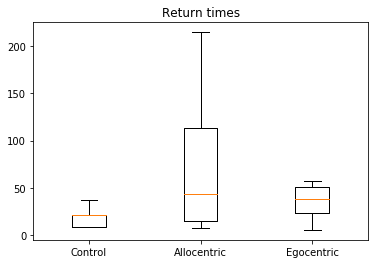

In [166]:
plt.title('Return times')
plt.boxplot([e2, e0, e1], labels=['Control', 'Allocentric', 'Egocentric'])

In [168]:
type_ = 'err'

e0 = results[results['group']==0][type_]
e1 = results[results['group']==1][type_]
e2 = results[results['group']==2][type_]
#print(normaltest(e0))
#print(normaltest(e1))
#print(normaltest(e2))

print(f_oneway(e0, e1, e2))

F_onewayResult(statistic=3.0638965749464857, pvalue=0.06454995746903675)


{'whiskers': [<matplotlib.lines.Line2D at 0x1377510b8>,
 'caps': [<matplotlib.lines.Line2D at 0x137751b00>,
 'boxes': [<matplotlib.lines.Line2D at 0x137751ac8>,
 'medians': [<matplotlib.lines.Line2D at 0x133bbdc88>,
 'fliers': [<matplotlib.lines.Line2D at 0x13776c4a8>,
 'means': []}

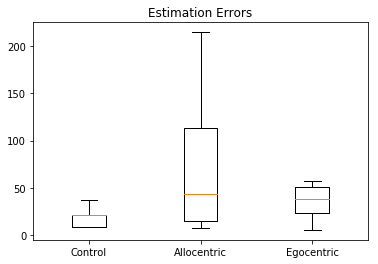

In [169]:
plt.title('Estimation Errors')
plt.boxplot([e2, e0, e1], labels=['Control', 'Allocentric', 'Egocentric'])

In [170]:
e0

1     147.946487
4       7.135922
5      45.038258
6       8.647261
7     214.428223
12    135.518066
15     11.737762
18     43.609173
22     42.714279
25     24.456274
Name: err, dtype: float32

In [171]:
print(e2.mean())
print(e0.mean())
print(e1.mean())

18.532825469970703
68.12318420410156
34.964019775390625


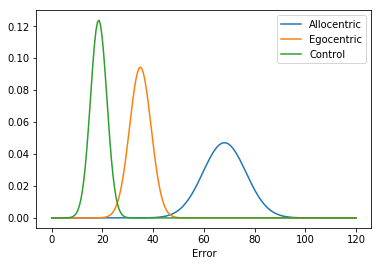

In [172]:
import math
from scipy import stats
for e, n in zip([e0, e1, e2], ['Allocentric', 'Egocentric', 'Control']):
    mu = e.mean()
    variance = e.std()
    sigma = math.sqrt(variance)
    x = np.linspace(0, 120, 200)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), label=n)
plt.xlabel('Error')
plt.legend()

In [173]:
e0

1     147.946487
4       7.135922
5      45.038258
6       8.647261
7     214.428223
12    135.518066
15     11.737762
18     43.609173
22     42.714279
25     24.456274
Name: err, dtype: float32

In [174]:
e1

0     53.817543
9     14.630140
11     5.525801
13    39.930580
19    31.675276
20    23.460749
21    37.843102
23    57.331455
24    50.461506
Name: err, dtype: float32

In [175]:
e2

2      9.089354
3     21.611198
8      8.576839
10    30.356682
14     8.370060
16     9.743195
17    21.134937
26    36.648048
27    21.265123
Name: err, dtype: float32

In [176]:
from scipy.stats import ttest_ind, wilcoxon, mannwhitneyu

In [177]:
mannwhitneyu(e0.iloc[1:], e1.iloc[1:])

MannwhitneyuResult(statistic=32.0, pvalue=0.3681384891705356)

In [178]:
mannwhitneyu

<function scipy.stats.stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)>

In [179]:
results.groupby('group').count()

err  time  return_times
group                         
0.0     10    10            10
1.0      9     9             9
2.0      9     9             9

In [180]:
h = headings_csv[8]

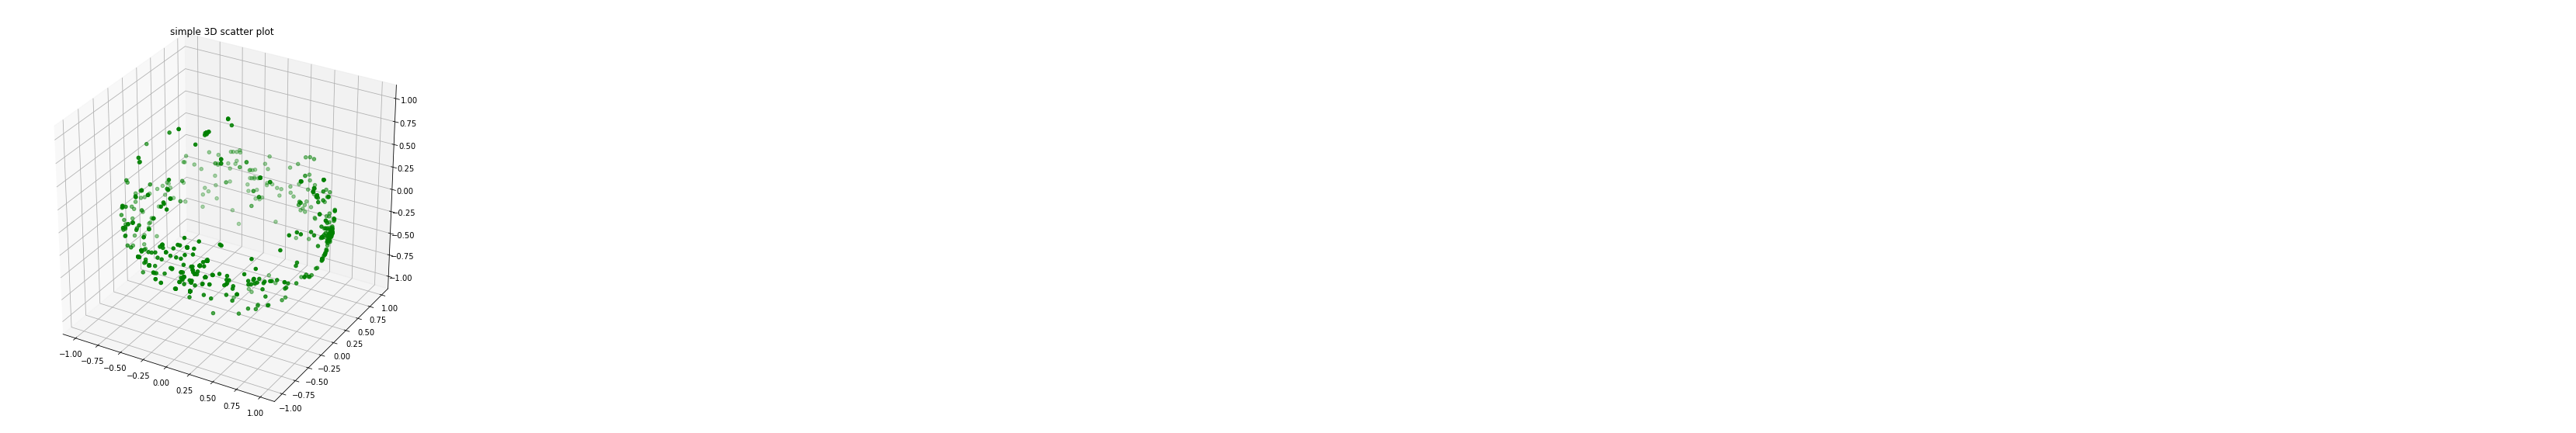

In [181]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
# Creating figure
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(h.z, h.x, h.y, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

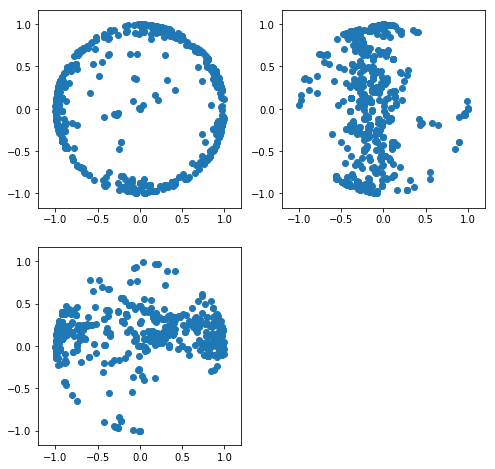

In [182]:
lim = 1.2
plt.figure(figsize=(8, 8))
plt.subplot(222)
plt.axis('equal')
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.scatter(h.y, h.z)
plt.subplot(221)
plt.axis('equal')
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.scatter(h.x, h.z)
plt.subplot(223)
plt.axis('equal')
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.scatter(h.x, -h.y)

In [183]:
def cart_to_spherical(x, y, z):
    theta = np.arctan(np.sqrt(x**2 + y**2)/z)
    phi = np.arctan2(y, x)
    return theta, phi

In [184]:
theta, phi = cart_to_spherical(h.x, h.z, h.y)

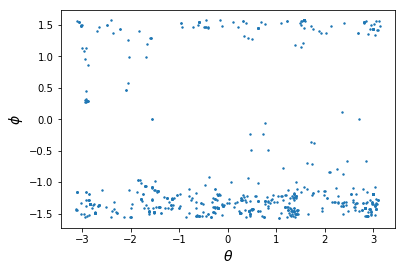

In [185]:
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$\phi$', fontsize=14)

plt.scatter(phi, theta, s=2)

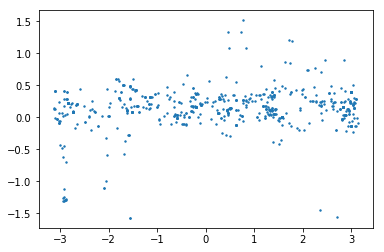

In [186]:
plt.scatter(phi, (theta+np.pi/2+np.pi/2) % np.pi - np.pi/2, s=2)

In [187]:
theta2 = (theta+np.pi/2+np.pi/2) % np.pi - np.pi/2
theta2 = theta2.append(pd.Series([-np.pi/2, np.pi/2]))
phi = phi.append(pd.Series([-np.pi, np.pi]))

In [188]:
def myplot(x, y, s, bins=300):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    margin = 0
    extent = [xedges[0]-margin, xedges[-1]+margin, yedges[0]-margin, yedges[-1]+margin]
    return heatmap.T, extent

Text(0.5, 1.0, 'Heading distribution')

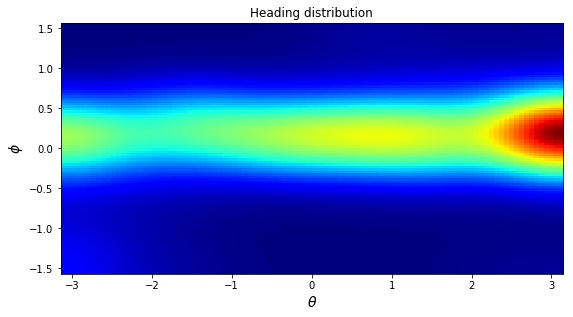

In [189]:
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
from scipy import stats

img, extent = myplot(phi, theta2, 10, bins=100)
plt.figure(figsize=(9, 5))
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$\phi$', fontsize=14)

plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
plt.title('Heading distribution')

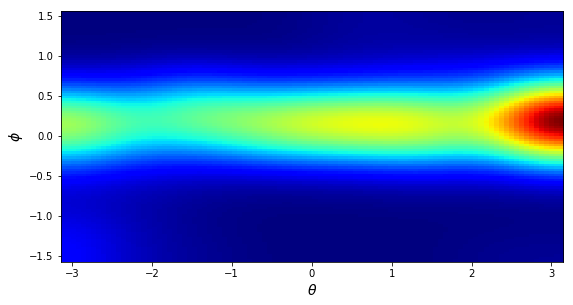

In [190]:
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
from scipy import stats

img, extent = myplot(phi, theta2, 10, bins=100)
plt.figure(figsize=(9, 5))
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$\phi$', fontsize=14)

plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)

In [191]:
def spherical2cart(p, t):
    x = np.cos(t)*np.sin(p)
    y = np.sin(t)*np.sin(p)
    z = np.cos(p)
    return x, y, z

In [192]:
len(np.linspace(extent[0], extent[1], 500))

500

In [193]:
stats.entropy(img.ravel())

8.58072147656926

In [194]:
def calculate_entropy(x, y, z, bins=300, s=40):
    t, p = cart_to_spherical(x, y, z)
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    return stats.entropy(heatmap.ravel())

2 ---> 11.053743486861343


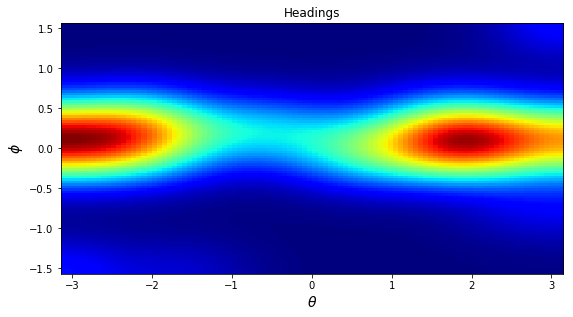

0 ---> 10.764596584823588


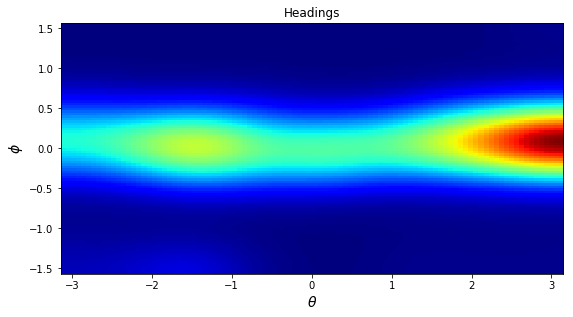

0 ---> 11.104238126006019


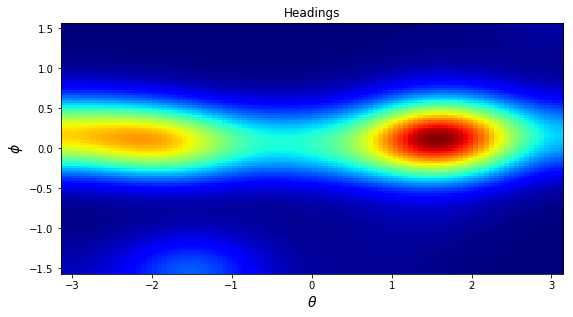

2 ---> 10.696872066579106


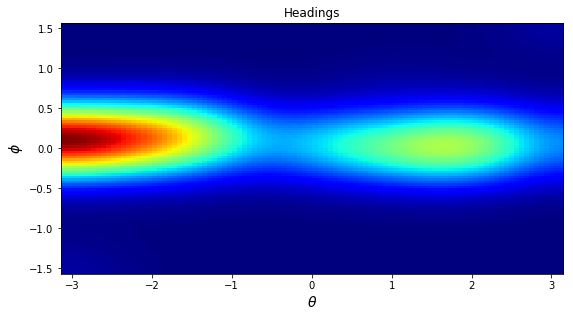

0 ---> 11.229111246021585


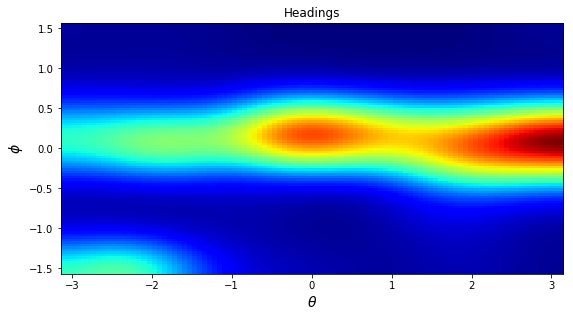

0 ---> 10.837958054080993


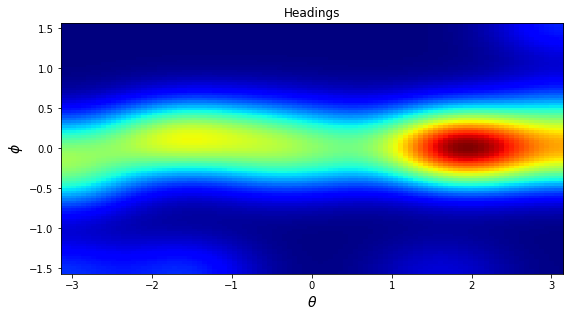

0 ---> 11.205994900282475


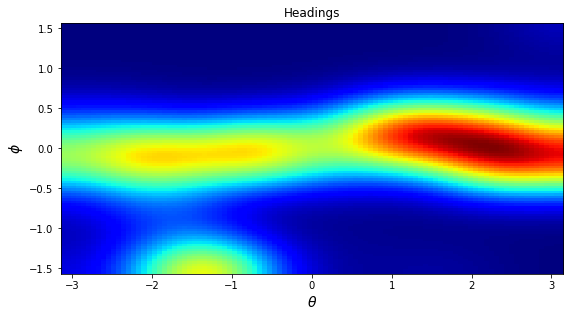

0 ---> 10.956249564234742


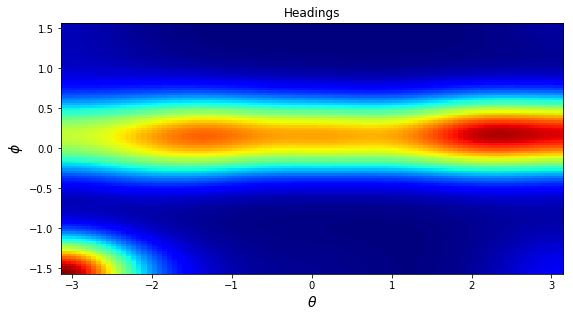

1 ---> 11.15960963022643


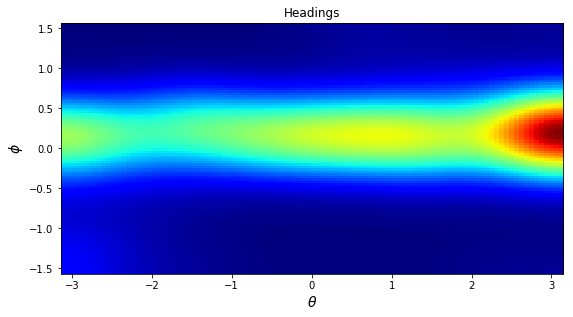

1 ---> 10.87640613574953


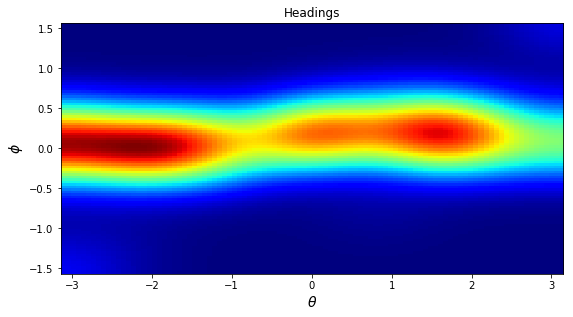

2 ---> 11.072889863908344


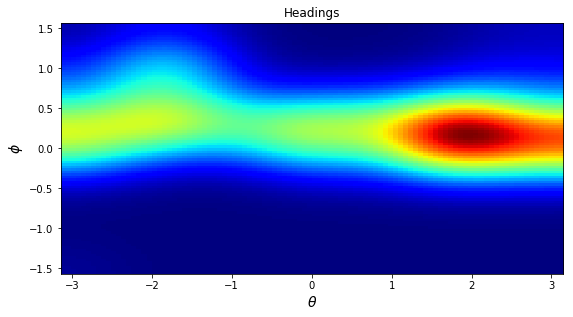

1 ---> 11.008436015430949


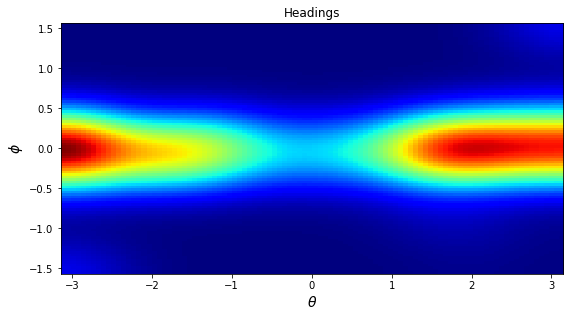

0 ---> 10.821132334285128


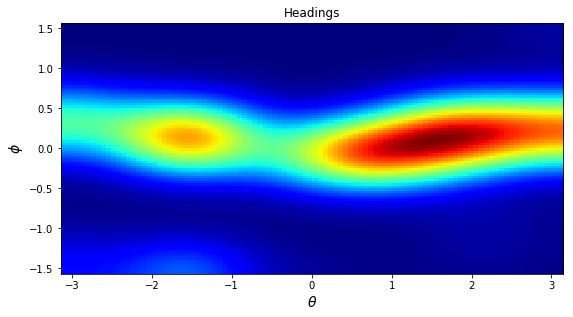

1 ---> 10.871241833654537


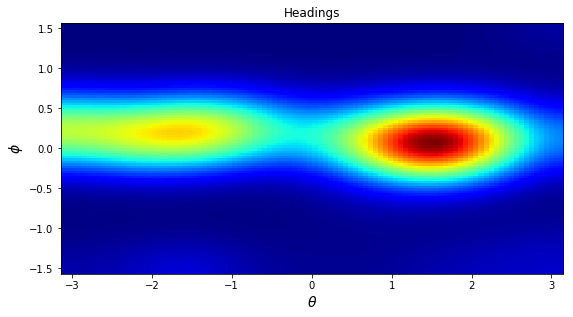

1 ---> 10.614060770354154


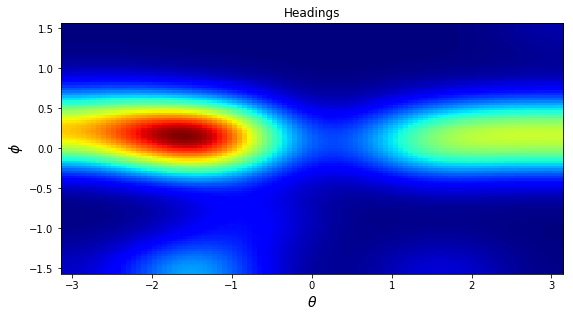

2 ---> 10.996098927793666


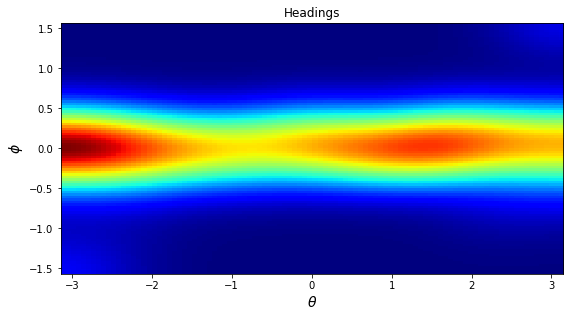

1 ---> 10.97233471433535


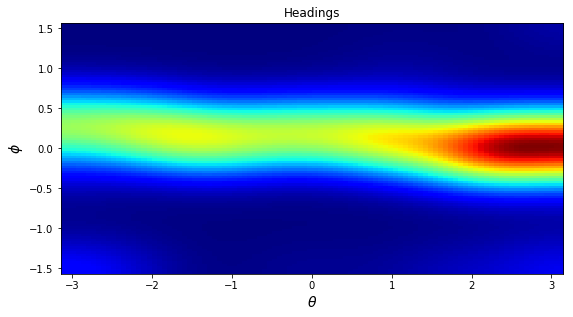

0 ---> 11.068594980745859


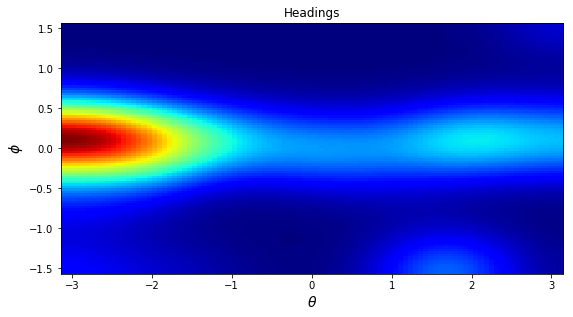

1 ---> 10.779880419589382


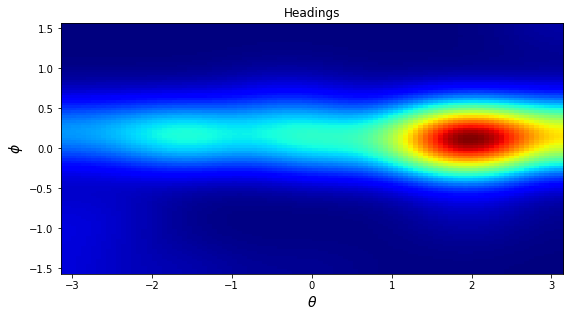

0 ---> 11.093781055381527


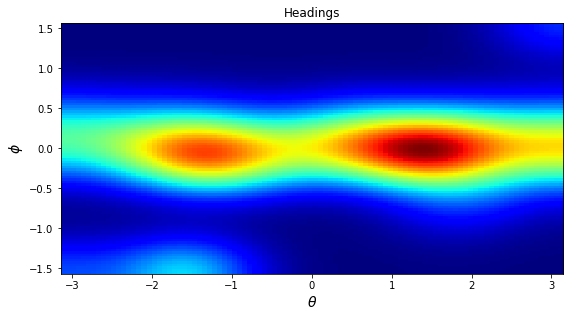

2 ---> 11.031929571322811


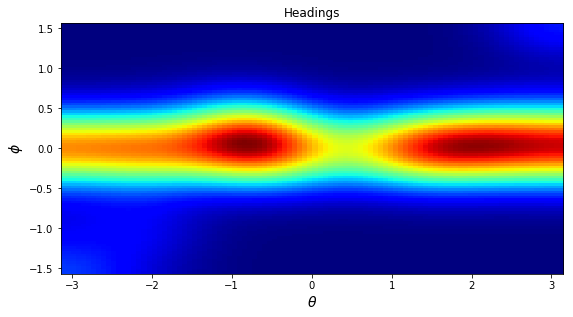

1 ---> 11.06832624318387


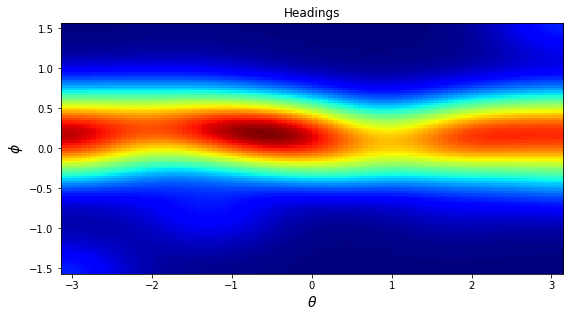

2 ---> 11.0980519009393


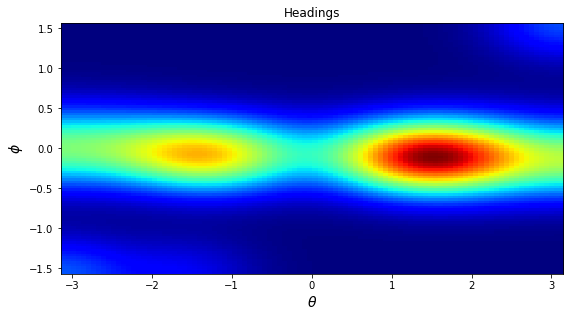

1 ---> 10.836721536738233


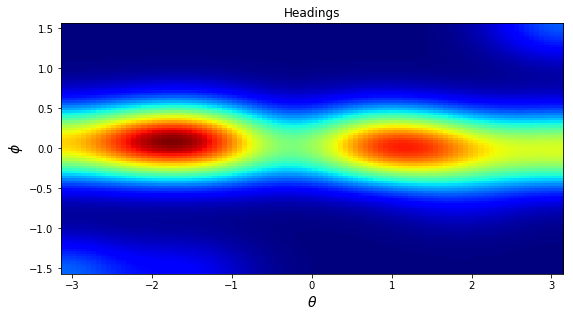

2 ---> 10.76301185151751


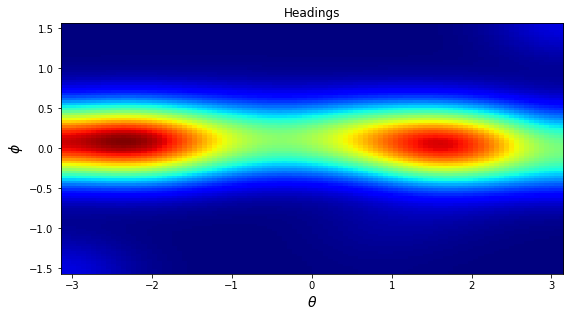

2 ---> 11.051495554800665


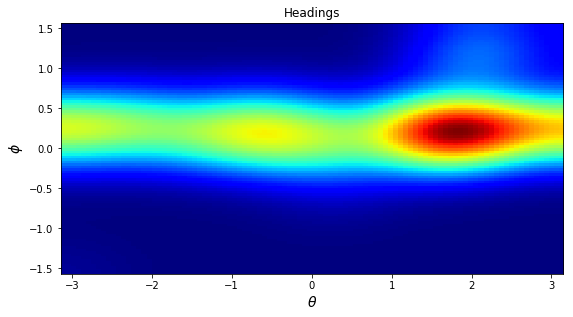

2 ---> 11.04371554239476


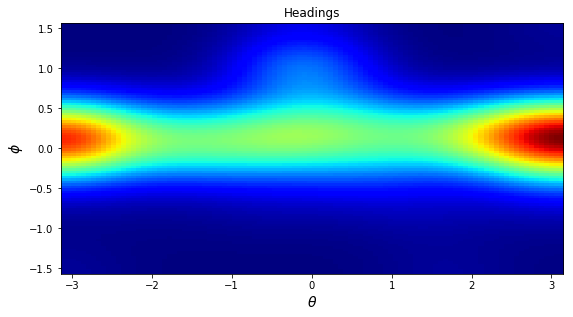

0 ---> 10.872046515141628


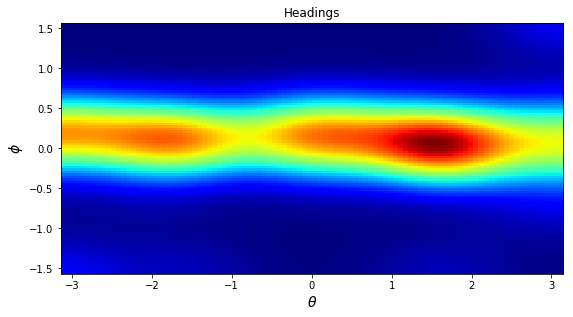

In [195]:
types = []
Hs = []

for h, name in zip(headings_csv, headings):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1]

    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    H = calculate_entropy(h[split_idx:].x, h[split_idx:].z, h[split_idx:].y)
    print(exp_type, '--->', H)
    
    t, p = cart_to_spherical(h.x, h.z, h.y)
    theta2 = (t+np.pi/2+np.pi/2) % np.pi - np.pi/2
    
    theta2 = theta2.append(pd.Series([-np.pi/2, np.pi/2]))
    phi = p.append(pd.Series([-np.pi, np.pi]))
    
    img, extent = myplot(phi, theta2, 10, bins=100)
    plt.figure(figsize=(9, 5))
    plt.title('Headings')
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.ylabel(r'$\phi$', fontsize=14)
    plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
    plt.show()
    
    types.append(float(exp_type))
    Hs.append(H)

In [196]:
entropies = pd.DataFrame(np.array([types, Hs]).T,
             columns=['group', 'H'])

In [197]:
entropies.groupby('group')['H'].mean()

group
0.0    10.995370
1.0    10.909669
2.0    10.978645
Name: H, dtype: float64

In [198]:
entropies.groupby('group')['H'].std()

group
0.0    0.167009
1.0    0.163347
2.0    0.144637
Name: H, dtype: float64

In [199]:
g1 = entropies[entropies['group']==0]['H'].values
g2 = entropies[entropies['group']==1]['H'].values
g3 = entropies[entropies['group']==2]['H'].values

In [200]:
from scipy.stats import f_oneway

In [201]:
f_oneway(g1, g2, g3)

F_onewayResult(statistic=0.7571264781283168, pvalue=0.4794658358284811)

In [202]:
entropies.groupby('group')['H'].count()

group
0.0    10
1.0     9
2.0     9
Name: H, dtype: int64

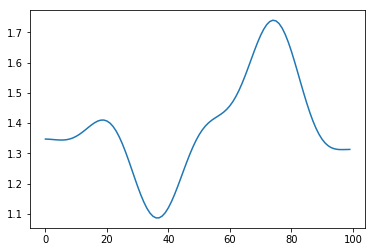

In [203]:
plt.plot(img.sum(axis=0))

2 ---> 11.053743486861343


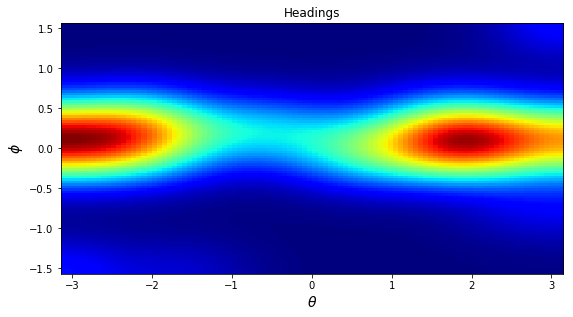

0 ---> 10.764596584823588


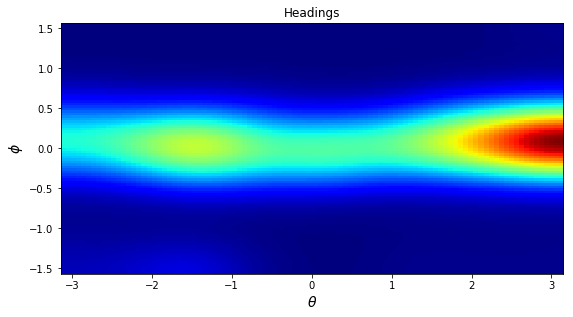

0 ---> 11.104238126006019


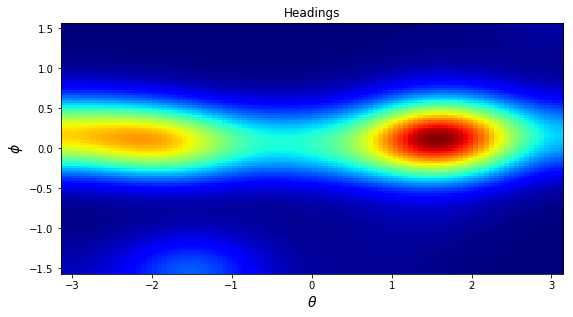

2 ---> 10.696872066579106


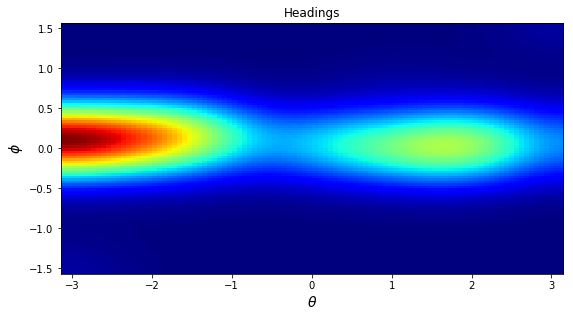

0 ---> 11.229111246021585


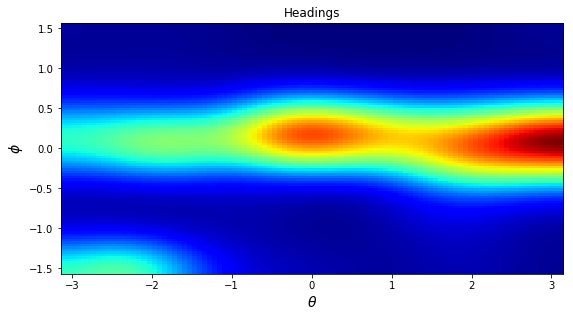

0 ---> 10.837958054080993


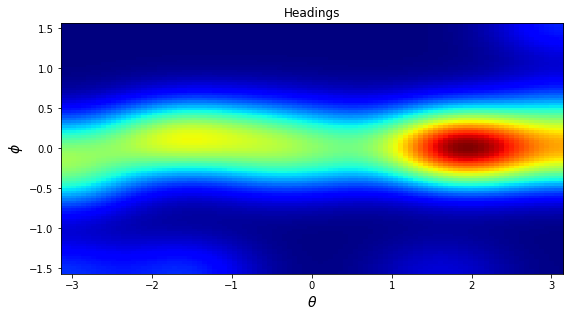

0 ---> 11.205994900282475


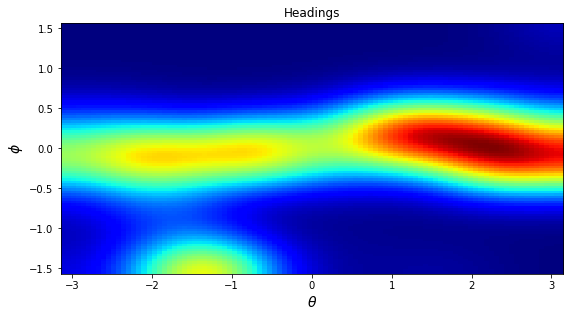

0 ---> 10.956249564234742


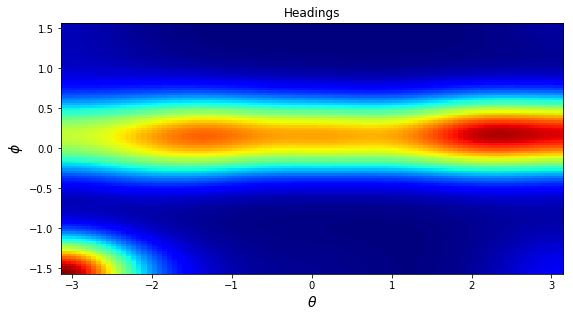

1 ---> 11.15960963022643


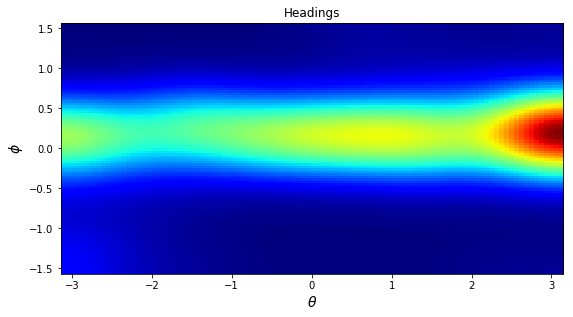

1 ---> 10.87640613574953


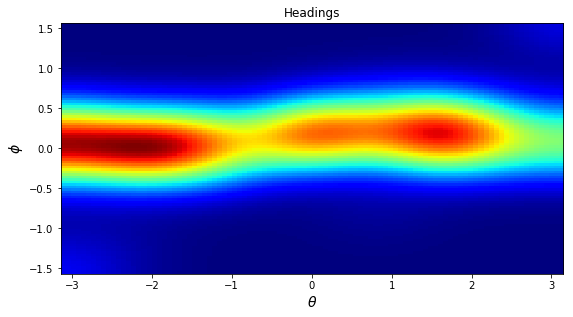

2 ---> 11.072889863908344


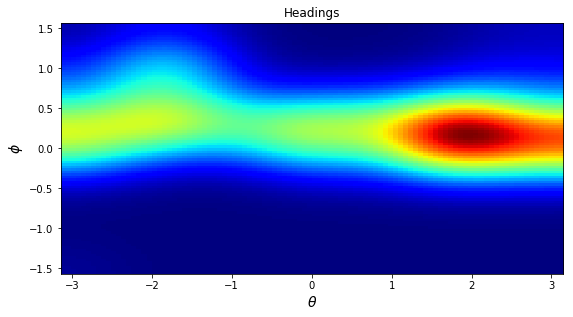

1 ---> 11.008436015430949


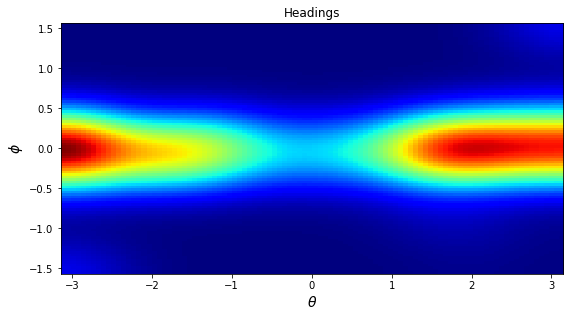

0 ---> 10.821132334285128


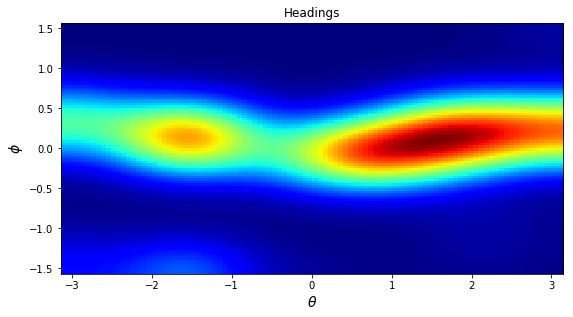

1 ---> 10.871241833654537


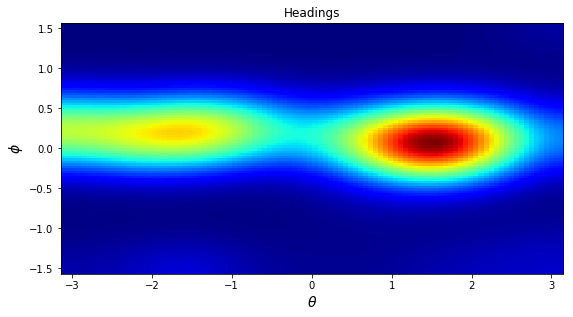

1 ---> 10.614060770354154


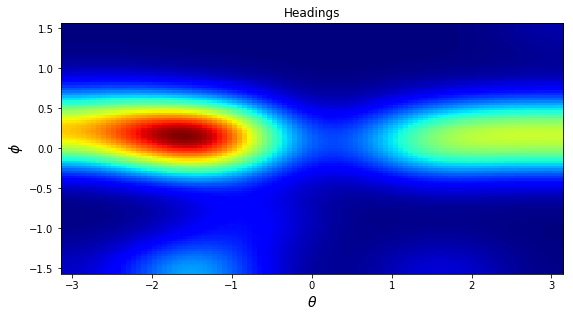

2 ---> 10.996098927793666


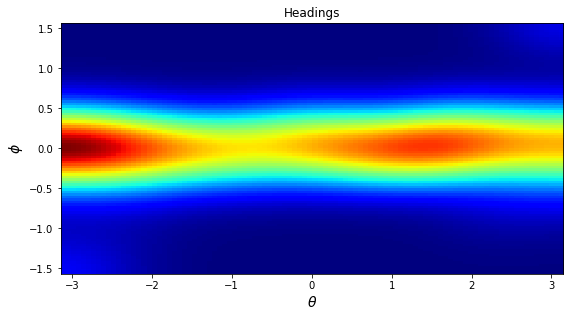

1 ---> 10.97233471433535


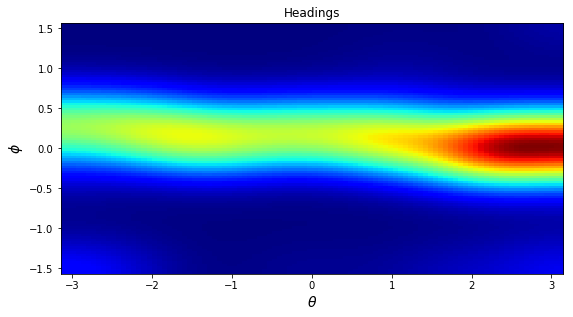

0 ---> 11.068594980745859


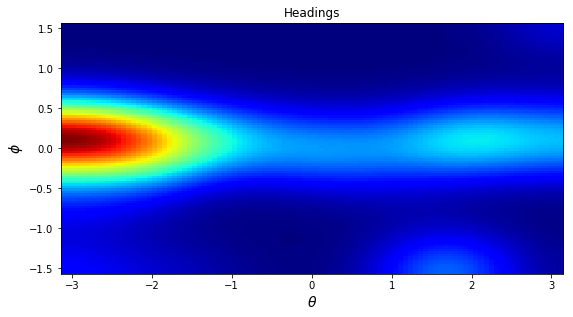

1 ---> 10.779880419589382


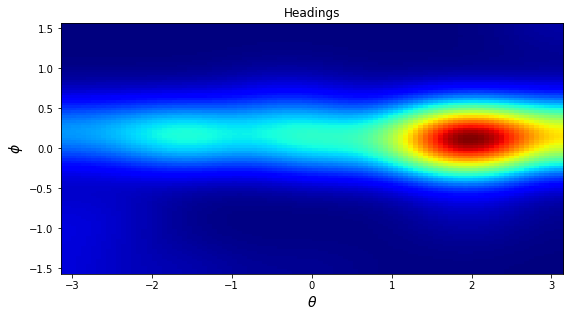

0 ---> 11.093781055381527


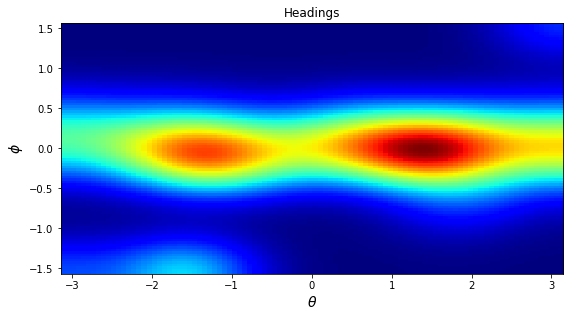

2 ---> 11.031929571322811


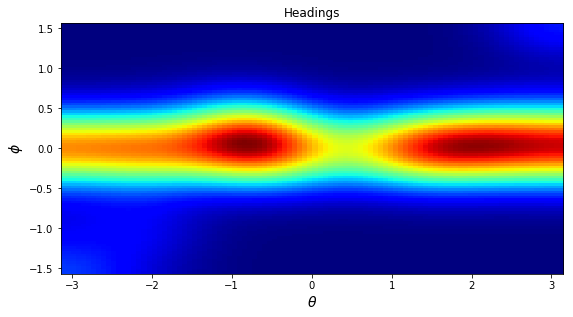

1 ---> 11.06832624318387


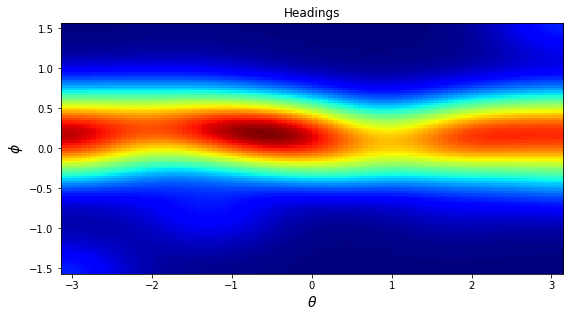

2 ---> 11.0980519009393


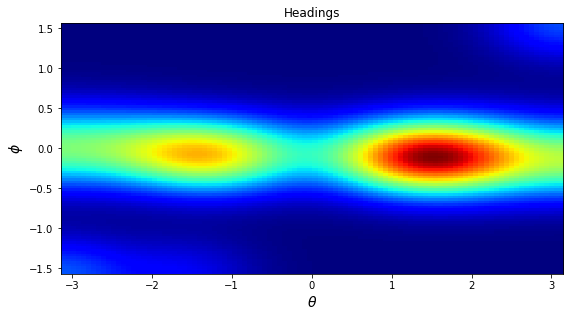

1 ---> 10.836721536738233


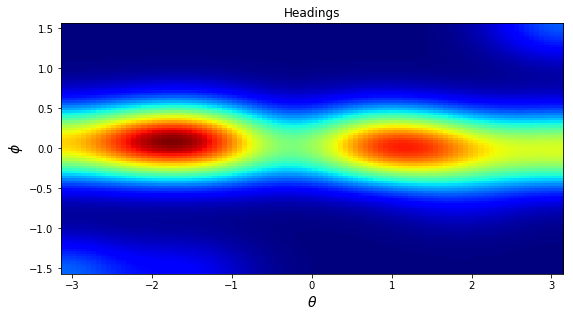

2 ---> 10.76301185151751


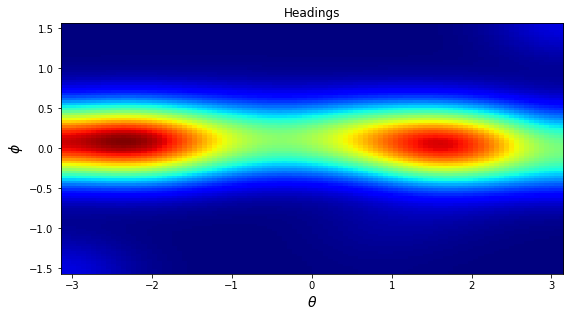

2 ---> 11.051495554800665


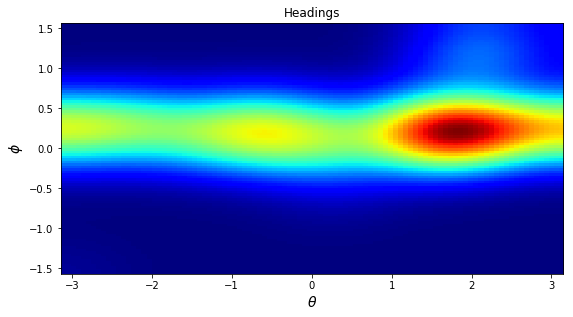

2 ---> 11.04371554239476


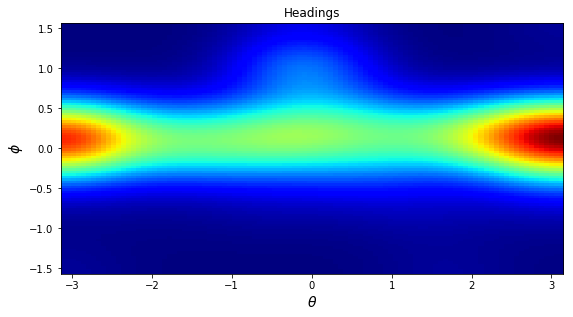

0 ---> 10.872046515141628


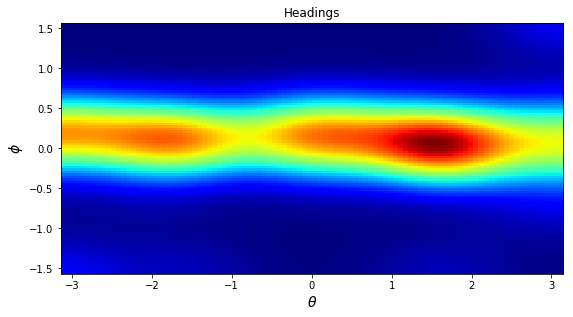

In [204]:
types = []
Hs = []

for h, name in zip(headings_csv, headings):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1]

    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    H = calculate_entropy(h[split_idx:].x, h[split_idx:].z, h[split_idx:].y)
    print(exp_type, '--->', H)
    
    t, p = cart_to_spherical(h.x, h.z, h.y)
    theta2 = (t+np.pi/2+np.pi/2) % np.pi - np.pi/2
    
    theta2 = theta2.append(pd.Series([-np.pi/2, np.pi/2]))
    phi = p.append(pd.Series([-np.pi, np.pi]))
    
    img, extent = myplot(phi, theta2, 10, bins=100)
    plt.figure(figsize=(9, 5))
    plt.title('Headings')
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.ylabel(r'$\phi$', fontsize=14)
    plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
    plt.show()
    
    types.append(float(exp_type))
    Hs.append(stats.entropy(img.sum(axis=0)))

In [205]:
entropies = pd.DataFrame(np.array([types, Hs]).T,
             columns=['group', 'H'])

In [206]:
entropies.groupby('group')['H'].mean()

group
0.0    4.573740
1.0    4.565837
2.0    4.573910
Name: H, dtype: float64

In [207]:
entropies.groupby('group')['H'].std()

group
0.0    0.032585
1.0    0.029982
2.0    0.021802
Name: H, dtype: float64